# Introduction to Itô Calculus and Itô Integrals

Classical calculus is built upon the notion of smooth functions and deterministic change. It provides powerful tools for analyzing systems where quantities evolve in a predictable, continuous manner. However, many phenomena in nature and financial markets are inherently random and exhibit irregular behavior that defies classical analysis. A central example of such randomness is *Brownian motion*, denoted by $W(t)$, which is continuous everywhere but differentiable nowhere, and whose sample paths exhibit infinite variation over any interval.

To study systems influenced by such randomness, we require a new mathematical framework. Itô calculus, developed by Kiyoshi Itô in the 1940s,**extends classical calculus to stochastic processes**, and in particular to Brownian motion. At the heart of this theory lies the Itô integral, which allows us to define integrals of the form

$$
\int_0^T \Lambda(t)\, dW(t),
$$

where $\Lambda(t)$ is an adapted stochastic process (possibly random and time-varying), and $W(t)$ is a Brownian motion.

The Itô integral differs fundamentally from ordinary integrals in several respects:

- The integrator $W(t)$ is not differentiable, so the usual definition of the integral via Riemann or Lebesgue techniques does not apply.
- The integral is constructed as a limit of discrete stochastic sums, in which the integrand is evaluated at the *left endpoints* of time intervals. This choice ensures the integral is well-defined for adapted processes and models realistic trading strategies in financial contexts.
- Because Brownian motion has nonzero **quadratic variation**, the rules of classical calculus (such as the chain rule) no longer hold in their usual form.

The Itô integral reflects the irregular and volatile nature of Brownian paths. Its definition avoids differentiating Brownian motion (which is impossible in the classical sense) and instead builds on summing stochastic increments—capturing both randomness and timing.

This departure from classical intuition gives rise to one of the most important results in stochastic calculus: the **Itô-Doeblin formula**, a stochastic generalization of the chain rule. For a twice differentiable function $f(x)$ and Brownian motion $W(t)$, it states:

$$
df(W(t)) = f'(W(t))\, dW(t) + \frac{1}{2} f''(W(t))\, dt,
$$

which highlights the appearance of a **correction term** involving the second derivative. This term arises due to the **accumulation of variance** from Brownian motion over infinitesimal intervals (a fact which we showed in the previous chapter).

Itô calculus is not merely a mathematical curiosity—it plays a central role in modeling in finance (e.g., the Black-Scholes-Merton model), physics (e.g., diffusion processes), and engineering (e.g., filtering theory). It enables us to formulate and solve stochastic differential equations (SDEs), in which randomness drives the evolution of systems over time.

In this chapter, we begin by carefully defining the Itô integral for simple (piecewise constant) integrands, then extend the construction to general stochastic processes. We examine key properties such as linearity, continuity, martingale behavior, and the Itô isometry. With these foundations, we develop the Itô-Doeblin formula, establishing the core of stochastic calculus and preparing the ground for applications in stochastic modeling and financial mathematics. Based on that, we then proceed with the definition of the Black-Scholes Merton formula

---

## Intuition of Itô's Integral as a trading strategy

To motivate the Itô integral, consider a financial interpretation:

Suppose you're an investor trading a risky asset whose price evolves randomly — modeled by a **Brownian motion W(t)**. You follow a trading strategy $\Lambda(t)$, which tells you how many shares you hold at each point in time. This strategy is defined once in each subinterval and remains constant in this interval. This position can change based on the past and present information, but not future prices — this makes $\Lambda(t)$ an adapted process.

The total gain (or loss) from this trading activity up to time T is represented by the Itô integral:

$$
I(T) = \int^T_0 \Lambda(t)dW(t)
$$

where:

- $W(t)$ represent the (simplified) price of an asset evolving as a Brownian motion.
- $\Lambda(t)$ is the trading strategy and defines the number of shares held at time $t$.
- $dW(t)$ is the infinitesimal price movement (random).
- $\Lambda(t)dW(t)$ is the gain / loss from holding that position for a very short period.

In real trading, you adjust your portfolio at certain intervals. So first, we divide the trading horizon into discrete intervals using the partition $\prod = {t_0, t_1, ..., t_n}$. Importantly, we assume that the number of shares held ($\Lambda(t)$) is **constant on each subinterval t**. 

1. **From $t_0$ to $t_1$**:  
   The initial position is $\Lambda(t_0)$, and the asset price changes from $W(t_0)$ to $W(t)$. The gain is:

   $$
   I(t) = \Lambda(t_0) [W(t) - W(t_0)], \quad t_0 \leq t \leq t_1.
   $$

2. **From $t_1$ to $t_2$**:  
   At $t_1$, the trader **updates their position** to $\Lambda(t_1)$. The gain now includes both the previous gain and the new trading activity:

   $$
   I(t) = \Lambda(t_0) [W(t_1) - W(t_0)] + \Lambda(t_1) [W(t) - W(t_1)], \quad t_1 \leq t \leq t_2.
   $$

3. **From $t_2$ to $t_3$**:  
   At $t_2$, the trader **updates their position** again to $\Lambda(t_2)$. The total gain now becomes:

   $$
   I(t) = \Lambda(t_0) [W(t_1) - W(t_0)] + \Lambda(t_1) [W(t_2) - W(t_1)] + \Lambda(t_2) [W(t) - W(t_2)], \quad t_2 \leq t \leq t_3.
   $$

4. **Total Gain over time**

Once we add up all the gains across subintervals, we obtain:

$$
I(T) \approx \sum_{j=0}^{n-1} \Lambda(t_j)[W(t_{j+1}) - W(t_j)]
$$

This is exactly how Itô defined the integral for simple processes. As you let the trading intervals get finer, this sum converges to the Itô integral:

$$
I(T) = \int^T_0 \lambda(t)dW(t)
$$

In the sum above, you always evaluate $\Lambda(t_j)$ and not $\Lambda(t_{j+1})$ for one crucial reason: **You must decide your position before the asset price moves**. In finance, you can’t choose a trading position after seeing future prices. So your strategy must depend only on past and current information — that's what we mean by **adapted** filtration process such as a Brownian Motion. This is why Itô integrals use left-endpoints and why the Itô integral is realistic for modeling trading gains.

Considering everything, the trading strategy intuition provides a natural interpretation for the Itô integral. 

- We model cumulative gains from dynamically adjusting positions in an asset following Brownian motion. 
- At each trading time $t_j$, the position $\Lambda(t_j)$ is chosen based only on available information up to time $t_j$, and is held constant over the interval $[t_j, t_{j+1})$.
- This motivates the idea of **simple processes** — stochastic processes that are piecewise constant and adapted to the filtration generated by $W(t)$ (left-hand notion) - so they change throughout intervals but remain the same within. 
- Such processes accurately reflect how real-world strategies operate: traders can only act on current information, not on future prices.

--

## **Itô’s Integral for simple Integrands**

To define the Itô integral rigorously, we begin with a class of integrands known as **simple processes**. These are piecewise constant processes adapted to the filtration generated by Brownian motion.

### Definition of a simple process

Let $\Pi = \{t_0, t_1, \dots, t_n\}$ be a partition of the interval $[0, T]$. A process $\Lambda(t)$ is called a **simple (elementary) process** if it takes the form:

$$
\Lambda(t) = \sum_{j=0}^{n-1} \Lambda(t_j) \, \mathbf{1}_{[t_j, t_{j+1})}(t),
$$

where each $\Lambda(t_j)$ is $\mathcal{F}_{t_j}$-measurable, meaning it depends only on the information available up to time $t_j$. In particular, $\Lambda(t)$ is **adapted** to the filtration $(\mathcal{F}_t)_{t \geq 0}$.

This structure mirrors the trading strategy from the previous section: the position is chosen at time $t_j$ and held constant until the next trading date $t_{j+1}$.

### Definition of the Itô integral

Let $W(t)$ be a standard Brownian motion. For a simple process $\Lambda(t)$ as defined above, the **Itô integral** over $[0, T]$ is given by:

$$
\int_0^T \Lambda(t) \, dW(t) := \sum_{j=0}^{n-1} \Lambda(t_j) \, [W(t_{j+1}) - W(t_j)].
$$

This defines a stochastic process $I(T)$ representing the cumulative gain from trading using the simple strategy $\Lambda(t)$.

### Time-Dependent Version

More generally, we can define a process-valued version of the integral:

$$
I(t) = \int_0^t \Lambda(s) \, dW(s),
$$

which represents the gain accumulated up to any time $t \in [0, T]$. For each subinterval $[t_k, t_{k+1})$, the process satisfies:

$$
I(t) = \sum_{j=0}^{k-1} \Lambda(t_j)[W(t_{j+1}) - W(t_j)] + \Lambda(t_k)[W(t) - W(t_k)], \quad t \in [t_k, t_{k+1}).
$$

This formulation allows us to study the integral as a stochastic process in time.

---

### Properties of the Itô Integral

nce the Itô integral is defined for simple processes, we can analyze its most important properties. These not only distinguish it from classical integrals but also reveal its power in stochastic modeling.

#### Martingale Property

Let $\Lambda(t)$ be a simple, adapted process and $W(t)$ be a standard Brownian motion. Then the Itô integral

$$
I(t) = \int_0^t \Lambda(s) \, dW(s)
$$

is a **martingale** with respect to the filtration $(\mathcal{F}_t)$ generated by $W(t)$. That is,

$$
\mathbb{E}[I(t) \mid \mathcal{F}_s] = I(s), \quad \text{for all } 0 \leq s \leq t.
$$

This reflects the fact that the expected future gain from trading — given all information so far — is zero.

#### Itô Isometry

The Itô integral preserves the $L^2$ norm in a very elegant way:

$$
\mathbb{E} \left[ \left( \int_0^T \Lambda(t) \, dW(t) \right)^2 \right] = \mathbb{E} \left[ \int_0^T \Lambda^2(t) \, dt \right].
$$

This is known as the **Itô isometry**. It is crucial for:

- Proving convergence of approximations.
- Extending the integral to more general integrands.
- Analyzing variance and risk.

#### Quadratic Variation

Unlike ordinary integrals, the Itô integral has **nonzero quadratic variation**. Specifically:

$$
[I, I](T) = \int_0^T \Lambda^2(t) \, dt.
$$

This means the process $I(t)$ accumulates "roughness" over time depending on the square of the trading intensity $\Lambda(t)$. Quadratic variation is pathwise — it is computed for each realization of the Brownian path, not averaged like variance.

### Differential Form and Itô Multiplication Rule

In differential notation, the Itô integral is written:

$$
dI(t) = \Lambda(t) \, dW(t),
$$

and squaring both sides using Itô's rule gives:

$$
dI(t)^2 = \Lambda^2(t) \, dt.
$$

This confirms that **quadratic variation** accumulates at rate $\Lambda^2(t)$ per unit time — a key difference from classical integrals.

### Preliminary comparison to ordinary calculus

In classical calculus, integration relies on functions being smooth (differentiable). The Riemann integral computes area under a curve assuming well-behaved paths.

However, Brownian motion $W(t)$ is **nowhere differentiable**, and its paths have **infinite variation**. As a result:

- The Riemann–Stieltjes integral $\int_0^T \Lambda(t) \, dW(t)$ does **not exist** in general.
- The **usual chain rule fails**. For example, if $f(W(t)) = W^2(t)$, we do **not** have:
  $$
  df(W(t)) = 2W(t) \, dW(t).
  $$
  Instead, stochastic calculus gives:
  $$
  df(W(t)) = 2W(t) \, dW(t) + dt.
  $$

This additional $dt$ term arises from the **nonzero quadratic variation** of Brownian motion:
$$
[dW, dW] = dt.
$$

Such corrections are not needed in ordinary calculus — they are unique to the stochastic setting. In this way, the Itô integral lays the groundwork for a new calculus that respects the nature of random paths.

A more precise version of this comparison will follow once we introduce general integrands and the Itô–Doeblin formula.

### Visualization of the Ito Integral for simple integrands

Now that we rigorously defined the Ito Integral for simple integrands, we can visualize it. 

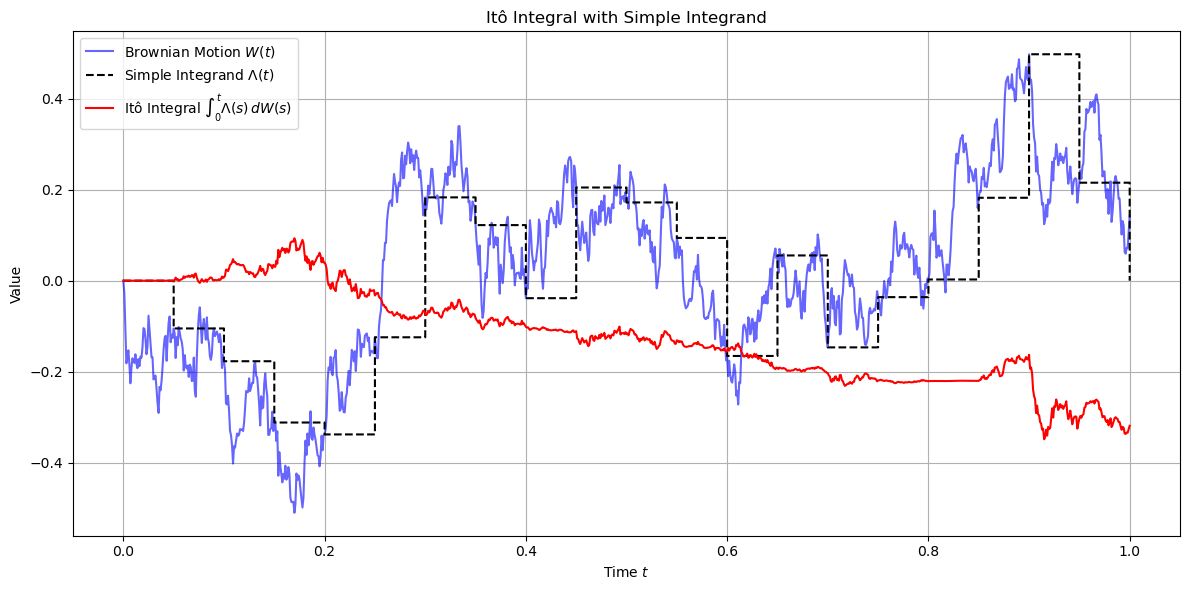

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0            # Total time
N = 1000           # Number of time steps
dt = T / N         # Time increment
t = np.linspace(0, T, N + 1)  # Time grid

# Simulate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))       # Brownian path

# Define a simple integrand: stepwise constant
partition_size = 50  # how many steps per constant interval
Lambda_simple = np.zeros_like(t)
for j in range(0, N, partition_size):
    Lambda_simple[j:j + partition_size] = W[j]  # use W(t_j) as value on [t_j, t_{j+1})

# Compute Itô integral: sum of Λ(t_j) * ΔW_j
Ito_integral = np.cumsum(Lambda_simple[:-1] * dW)
Ito_integral = np.concatenate(([0], Ito_integral))  # start from 0

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, W, label=r"Brownian Motion $W(t)$", color='blue', alpha=0.6)
plt.step(t, Lambda_simple, where='post', label=r"Simple Integrand $\Lambda(t)$", color='black', linestyle='--')
plt.plot(t, Ito_integral, label=r"Itô Integral $\int_0^t \Lambda(s)\, dW(s)$", color='red')
plt.xlabel("Time $t$")
plt.ylabel("Value")
plt.title("Itô Integral with Simple Integrand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This Python script simulates the **Itô integral**:

$$
I(T) = \int_0^T \Lambda(t) dW(t)
$$

where:
- $W(t)$ is a **Brownian motion** (Wiener process).
- $\Lambda(t)$ is a **stochastic process** (piecewise constant).
- The integral is approximated using a **discrete sum**.

We do the following:

#### Simulation of the Brownian Motion:

This code simulates a brownian motion:

```python
dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))       # Brownian path
```

where:

 - $dW \sim \mathcal{N}(0, \sqrt{dt})$: Generates Brownian motion increments using a normal distribution with Mean 0 (centered at zero) and the Standard deviation $\sqrt{dt}$ (scaling for continuous-time behavior).
 - $W(t)$: The Brownian path is computed as the cumulative sum of these increments.

This follows the discretization of Brownian motion:

- $W(t_{j+1}) = W(t_j) + dW_j$

#### Define the process $\Lambda$

This code defines the process $\Lambda$:

```python
Lambda_simple[j:j + partition_size] = W[j]
```

We define $\Lambda(t)$ to be piecewise constant, using the Brownian value at the start of each interval:

$$
\Lambda(t) = W(t_j)
$$

This reflects a trading strategy that holds a constant position during each interval.

#### Computing the Ito Integral approximation

This code computes the Ito integral approximation:

```python
Ito_integral = np.cumsum(Lambda[:-1] * dW)  # Sum of Λ(t) * dW
Ito_integral = np.concatenate(([0], Ito_integral))  # Start at zero
```

Where we compute the Ito integral approximation as:

$$
I(t) = \sum_{j=0}^{n-1}\Lambda(t_j)[W(t_{j+1}) - W(t_j)]
$$

which is exactly the discrete Itô integral for simple (stepwise constant) $\Lambda(t)$.

---

So far, we’ve developed the Itô integral for **simple integrands**, where $\Lambda(t)$ is a **step function**, piecewise-constant over intervals $[t_j, t_{j+1})$. 

This construction reflects discrete-time trading strategies, where positions are updated only at fixed times.

In reality, most stochastic processes **are not piecewise constant**. Instead, strategies may:
- **Vary continuously** (e.g., $\Lambda(t) = \sin(t)$).
- **Have unpredictable jumps** (e.g., processes with sudden price changes).

We therefore want to extend the Itô integral to **more general integrands**: stochastic processes $\Lambda(t)$ that are **not necessarily simple**, but possibly **continuous**, **càdlàg**, or even involve jumps.

To do so, we treat the simple integrals as **building blocks** and define the general integral as a **limit** of integrals with simple approximations.

## Ito's Integral for general integrands

###  **Key Conditions for Itô Integration**

To ensure mathematical well-posedness, $\Lambda(t)$ must satisfy:
1. **Adaptivity**: $\Lambda(t)$ must be **$\mathcal{F}(t)$-measurable**, meaning it only depends on past information.
2. **Square-Integrability**: The integral must satisfy the **finite variance condition**:
   $$
   \mathbb{E} \int_0^T \Lambda^2(t) dt < \infty.
   $$

### **Approximating General Integrands**

To rigorously define the Itô integral for a general stochastic process $\Lambda(t)$, we proceed by **approximating** it through a sequence of **simple processes**.

#### Partition the Time Interval

Let $\Pi_n = \{0 = t_0 < t_1 < \dots < t_n = T\}$ be a partition of $[0, T]$.

#### Build Stepwise Constant Approximations

For each $n$, we construct a **simple (stepwise constant) process** $\Lambda_n(t)$ that approximates $\Lambda(t)$ by:

$$
\Lambda_n(t) := \Lambda(t_j), \quad \text{for } t_j \leq t < t_{j+1}.
$$

In other words, $\Lambda_n(t)$ holds the value of $\Lambda(t)$ at the **left endpoint** of each subinterval, just like in the simple integrand case.

#### Take the Limit

As the partition becomes finer (i.e. $\max_j |t_{j+1} - t_j| \to 0$), the approximating sequence converges to the true process $\Lambda(t)$ in the mean-square sense:

$$
\lim_{n \to \infty} \mathbb{E} \left[ \int_0^T (\Lambda_n(t) - \Lambda(t))^2\, dt \right] = 0.
$$

#### Final Definition

We now define the Itô integral for general integrands as the **$L^2$ limit** of the Itô integrals for the simple approximations:

$$
\int_0^T \Lambda(t)\, dW(t) := \lim_{n \to \infty} \int_0^T \Lambda_n(t)\, dW(t).
$$

**Remark (On $L^2$ Convergence):**  
When we define the Itô integral for general integrands, we use a limit in the **$L^2$ sense**. That is, the simple process approximations $\Lambda_n(t)$ satisfy:

$$
\mathbb{E} \left[ \int_0^T (\Lambda_n(t) - \Lambda(t))^2 dt \right] \to 0.
$$

This ensures that the integrals $\int_0^T \Lambda_n(t)\, dW(t)$ converge in mean square to the true Itô integral. This type of convergence fits naturally with tools like the Itô isometry.

### **Properties of the Itô Integral for General Integrands**

The Itô integral $I(t) = \int_0^t \Lambda(u) dW(u)$ satisfies:

1. **(Continuity)**: The paths of $I(t)$ are **continuous**.
2. **(Adaptivity)**: $I(t)$ is **$\mathcal{F}(t)$-measurable**.
3. **(Linearity)**: If $I(t) = \int_0^t \Lambda(u) dW(u)$ and $J(t) = \int_0^t F(u) dW(u)$, then:
   $$
   I(t) \pm J(t) = \int_0^t (\Lambda(u) \pm F(u)) dW(u), \quad cI(t) = \int_0^t c\Lambda(u) dW(u).
   $$
4. **(Martingale Property)**: $I(t)$ is a **martingale**.
5. **(Itô Isometry)**: The second moment is given by:
   $$
   \mathbb{E} I^2(t) = \mathbb{E} \int_0^t \Lambda^2(u) du.
   $$
6. **(Quadratic Variation)**: The quadratic variation process is:
   $$
   [I, I](t) = \int_0^t \Lambda^2(u) du.
   $$

### **Example: Computing $\int_0^T W(t) dW(t)$**


#### **1. Goal**
We aim to compute the Itô integral:

$$
I(T) = \int_0^T W(t) dW(t),
$$

where $W(t)$ is a **standard Brownian motion**.

Since Brownian motion is **not differentiable**, we approximate this integral using **simple processes** and take the limit.

#### **2. Stepwise Approximation of $W(t)$**

To rigorously define the integral, we approximate $W(t)$ by a **piecewise constant function**.

##### **2.1. Partitioning the Interval**

- Divide $[0,T]$ into **$n$ equal subintervals**:
  
  $$
  0 = t_0 < t_1 < t_2 < \dots < t_n = T,
  $$
  
  where:

  $$
  t_j = \frac{jT}{n}, \quad j = 0, 1, \dots, n.
  $$

- Define a **stepwise approximation** of $W(t)$, denoted by $\Lambda_n(t)$:

  $$
  \Lambda_n(t) =
  \begin{cases} 
    W(0) = 0, & 0 \leq t < \frac{T}{n}, \\ 
    W\left(\frac{kT}{n}\right), & \frac{kT}{n} \leq t < \frac{(k+1)T}{n}.
  \end{cases}
  $$

Thus, $\Lambda_n(t)$ is **piecewise constant**, meaning that it takes the value of **$W(t)$ at the left endpoint of each subinterval**.

#### **3. Approximating the Integral as a Sum**
For each partition, we approximate the integral as:

$$
I_n(T) = \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)].
$$

#### **Interpretation:**
- **$W(t_j)$** is the **left-endpoint value** of the Brownian motion in subinterval $[t_j, t_{j+1}]$.
- **$[W(t_{j+1}) - W(t_j)]$** represents the **increment** over that interval.
- **Summing these products** gives an approximation to the Itô integral.

#### **4. Expanding the Itô Integral Using Quadratic Variation**

We want to compute the sum:

$$
I_n(T) = \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)],
$$

which approximates the Itô integral:

$$
I(T) = \int_0^T W(t) dW(t).
$$

Since **Brownian motion is not differentiable**, we use an **algebraic identity** to simplify this sum and analyze its limit as $n \to \infty$.

##### **Step 1: Expanding the Product $W(t_j) W(t_{j+1})$**

Using the **identity for expanding products**, we write:

$$
W(t_j) W(t_{j+1}) = \frac{1}{2} \left(W^2(t_{j+1}) + W^2(t_j) - (W(t_{j+1}) - W(t_j))^2\right).
$$

Rearranging this equation, we get:

$$
W(t_j) W(t_{j+1}) - W^2(t_j) = \frac{1}{2} \left(W^2(t_{j+1}) - W^2(t_j) - (W(t_{j+1}) - W(t_j))^2\right).
$$

Multiplying both sides by $W(t_j)$ and simplifying:

$$
W(t_j) [W(t_{j+1}) - W(t_j)] = \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2.
$$

This expresses the **incremental contribution** to the sum in terms of squared values of Brownian motion.

##### **Step 2: Summing Over All j**
Now, summing both sides over all time steps \( j = 0, ..., n-1 \):

$$
\sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)]
$$

Substituting our expansion from **Step 1**:

$$
\sum_{j=0}^{n-1} \left( \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2 \right).
$$

Since the **terms $W^2(t_j)$ telescope**, this simplifies to:

$$
\frac{1}{2} [W^2(T) - W^2(0)] - \frac{1}{2} \sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2.
$$

Since W(0) = 0, we obtain:

$$
I_n(T) = \frac{1}{2} W^2(T) - \frac{1}{2} \sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2.
$$

##### **Step 3: Understanding the Quadratic Variation Term**

The remaining sum,

$$
\sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2,
$$

is a **discrete approximation of the quadratic variation of Brownian motion**, which satisfies:

$$
\sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2 \approx T.
$$

Thus, in the **limit as $n \to \infty$**, we obtain:

$$
\int_0^T W(t) dW(t) = \frac{1}{2} W^2(T) - \frac{1}{2} T.
$$

#### **5. Understanding the Extra Term $-\frac{1}{2}T$**
##### **(a) Why This Doesn't Happen in Ordinary Calculus**
For a differentiable function $g(t)$, integration by parts gives:

$$
\int_0^T g(t) dg(t) = \frac{1}{2} g^2(T).
$$

This works because **in ordinary calculus, the squared increments vanish** as step sizes shrink:

$$
\sum_{j} (g(t_{j+1}) - g(t_j))^2 \to 0.
$$

However, **for Brownian motion**:

$$
\sum_{j} (W(t_{j+1}) - W(t_j))^2 \to T.
$$

This is the fundamental difference: **Brownian motion accumulates quadratic variation at a rate of $dt$**, while a differentiable function does not.

##### **(b) Why Itô Integration Uses Left-End Evaluation**
In the Itô integral:

$$
I(T) = \lim_{n \to \infty} \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)],
$$

the function $W(t_j)$ is evaluated **at the left endpoint**. This is crucial because:
- It ensures **adaptedness** (we cannot use future information).
- It causes **correlation between $W(t_j)$ and the increment $[W(t_{j+1}) - W(t_j)]$**.

If we instead evaluated at **midpoints** (as in the **Stratonovich integral**), the correction term would disappear, and the result would match ordinary calculus.

#### **6. Comparing Itô and Stratonovich Integrals**
A key distinction in stochastic calculus is between:
- The **Itô integral** $\int_0^T W(t) dW(t)$ (evaluates at the left endpoint).
- The **Stratonovich integral** $\int_0^T W(t) \circ dW(t)$ (evaluates at the midpoint).

If we had used **midpoints** instead of left-endpoints, the extra term would disappear:

$$
\int_0^T W(t) \circ dW(t) = \frac{1}{2} W^2(T).
$$

Thus, **the choice of evaluation point affects the integral’s result**.

#### **7. Summary: Why the Additional Term Appears**
1. **Brownian motion has nonzero quadratic variation**:
   - Unlike smooth functions, it satisfies:
     $$
     [W, W](T) = T.
     $$

2. **The Itô integral accumulates a correction term due to quadratic variation**:
   - When summing discrete increments:
     $$
     W(t_j) [W(t_{j+1}) - W(t_j)] = \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2.
     $$
   - The second term contributes **$-\frac{1}{2}T$**.

3. **Itô vs. Stratonovich Integration**:
   - The Itô integral evaluates at **left endpoints** (causing the correction).
   - The Stratonovich integral evaluates at **midpoints**, avoiding the correction.

4. **Final Result**:
   - For a differentiable function: $\int_0^T g(t) dg(t) = \frac{1}{2} g^2(T)$.
   - For Brownian motion: $\int_0^T W(t) dW(t) = \frac{1}{2} W^2(T) - \frac{1}{2} T$.



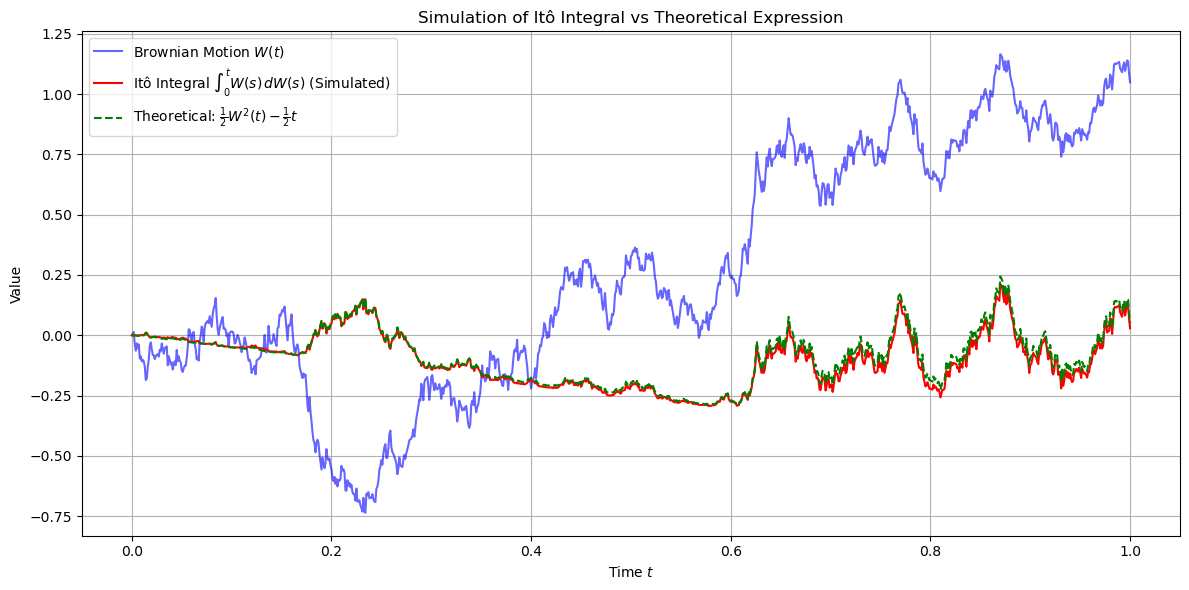

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0               # Time horizon
N = 1000              # Number of time steps
dt = T / N            # Time step size
t = np.linspace(0, T, N + 1)  # Time grid

# Simulate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=N)   # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))        # Brownian path

# Compute the Itô integral approximation: sum W(t_j) * dW_j
Ito_integral = np.cumsum(W[:-1] * dW)           # Left-endpoint approximation
Ito_integral = np.concatenate(([0], Ito_integral))

# Theoretical result from Itô's formula: (1/2) W(t)^2 - (1/2) t
Ito_formula = 0.5 * W**2 - 0.5 * t

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, W, label=r"Brownian Motion $W(t)$", color='blue', alpha=0.6)
plt.plot(t, Ito_integral, label=r"Itô Integral $\int_0^t W(s)\,dW(s)$ (Simulated)", color='red')
plt.plot(t, Ito_formula, label=r"Theoretical: $\frac{1}{2}W^2(t) - \frac{1}{2}t$", color='green', linestyle='dashed')
plt.xlabel("Time $t$")
plt.ylabel("Value")
plt.title("Simulation of Itô Integral vs Theoretical Expression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Comparison with Ordinary Calculus

#### What Happens in Deterministic Calculus

In ordinary calculus, if $g(t)$ is differentiable, we have:
$$
\int_0^T g(t)\,dg(t) = \frac{1}{2} g^2(T).
$$

This follows from the **chain rule** and integration by parts.

#### What Changes in Stochastic Calculus?

In Itô calculus, even though $W(t)$ is continuous, it is *nowhere differentiable* and accumulates **quadratic variation**:

$$
[W, W](T) = T.
$$

So, for the same-looking integral:
$$
\int_0^T W(t)\,dW(t),
$$
we now get:
$$
\int_0^T W(t)\,dW(t) = \frac{1}{2}W^2(T) - \frac{1}{2}T.
$$

This extra term $-\frac{1}{2}T$ is the result of **nonzero quadratic variation** and the way we define Itô integrals using **left-endpoint evaluation**.

### Why This Matters

This correction makes all the difference when working with stochastic models. Without it, we'd misprice derivatives, misunderstand volatility, and misuse standard calculus rules.

We'll formalize this contrast using the **Itô–Doeblin formula** in the next section.

---

## **Itô-Doeblin Formula: Connecting Itô Integration to Stochastic Differentiation**

In the previous sections, we developed the Itô integral:

$$
I(t) = \int^T_0 \Lambda(t)dW(t)
$$

first for simple processes and then extended it to general integrands using $L^2$ limits. This stochastic integral is used to model a Brownian motion which is typically apparent in financial markets as it circumvents the non-differentiability condition of Brownian motion (due to which it cannot be modeled through standard calculus integrals).

We saw how this stochastic integral differs from classical Riemann–Stieltjes integrals, particularly through the appearance of correction terms due to the quadratic variation of Brownian motion. 

As such, we define the stochastic integral as: 

$$
\int_0^T W(t)\,dW(t) = \frac{1}{2}W^2(T) - \frac{1}{2}T.

$$

Which differs from the standard calculus integral of:

$$
\int_0^T g(t)\,dg(t) = \frac{1}{2} g^2(T).
$$

With this integral, we're able to model Brownian motion.

### From Ordinary Chain Rule to Stochastic Chain Rule

Given this result, a natural question now arises: 

```
What happens if we apply ordinary calculus rules, such as the chain rule, to functions of stochastic processes like $W(t)$?
```

In classical calculus, for a differentiable function $f(x)$ and a differentiable process $x(t)$, we apply the chain rule:

$$
\frac{d}{dt}f(x(t)) = f'(x(t))*x'(t)
$$

or in differential form:

$$
df(x(t)) = f'(x(t))dx(t)
$$

However, Brownian motion $W(t)$ is nowhere differentiable, and has nonzero quadratic variation:

$$
[W,W](t)=t
$$

This fundamentally alters the rules of calculus. When $x(t) = W(t)$, we cannot simply write:

$$
df(W(t)) = f'(W(t))dW(t)
$$

Instead, the stochastic version of the chain rule introduces an additional correction term:

$$
df(W(t)) = f'(W(t))dW(t) + \frac{1}{2}f''(W(t))dt
$$

This is the essence of the Itô–Doeblin formula.

This formula is not just a curiosity—it explains why the Itô integral behaves differently than classical integrals. Recall our earlier example:

$$
\int^T_0 W(t)dW(t) = \frac{1}{2}W^2(T) - \frac{1}{2}T
$$

which does not follow the classical identity $\frac{1}{2}W^2(T)$ due to the nonzero quadratic variation of $W(t)$. The Itô–Doeblin formula formalizes this behavior.

We will now present the Itô–Doeblin formula in both differential and integral form and understand how it generalizes the chain rule to stochastic processes. We’ll begin with functions of Brownian motion $f(W(t))$, then extend to more general Itô processes of the form:

$$
X(t) = X(0) + \int^t_0 \Lambda(u)dW(u) + \int^t_0 \beta(u)du
$$

This sets the stage for stochastic differential equations (SDEs), and ultimately for applications like the Black–Scholes formula.

### Itô-Doeblin Formula for Brownian Motion

For a **differentiable function** f(W(t)), the standard chain rule suggests:

$$
df(W(t)) = f'(W(t)) dW(t).
$$

However, due to **the quadratic variation property** of Brownian motion:

$$
dW(t) dW(t) = dt,
$$

the correct form of the **Itô-Doeblin formula** is:

$$
df(W(t)) = f'(W(t)) dW(t) + \frac{1}{2} f''(W(t)) dt.
$$

Integrating both sides from 0 to T, we get:

$$
f(W(T)) - f(W(0)) = \int_0^T f'(W(u)) dW(u) + \frac{1}{2} \int_0^T f''(W(u)) du.
$$

This formula **directly connects to Itô integration**:
- The first term is an **Itô integral**, introduced earlier.
- The second term is a **standard integral** with respect to time.

This additional term **does not appear in ordinary calculus** because Brownian motion has **nonzero quadratic variation**, unlike smooth functions.

### Itô-Doeblin Formula for Functions of Time and Brownian Motion (Generalizing to Itô Processes

Now, let’s generalize to functions of both **time and Brownian motion**, i.e., f(t, W(t)). 

Let $f(t, X(t))$ be a function where $X(t)$ is an Itô process of the form:

$$
dX(t) = \Lambda(t)dW(t) + \Theta(t)dt
$$

We seek to compute the differential $df(t, X(t))$.

We start by applying a stochastic Taylor expansion. Since $X(t)$ is a stochastic process with nonzero quadratic variation, we expand $f$ in both $t$ and $X(t)$:

$$
df(t,X(t)) = f_t(t, X(t))dt + f_x(t,X(t))dX(t) + \frac{1}{2}f_{xx}(t,X(t))(dX(t))^2
$$

Next, we use the Itô product rules. From earlier, we know:

$$
(d(X(t)))^2 = \Lambda^2(t)dt
$$

because $(dW(t))^2 = dt$ and $dt \cdot dW(t) = 0$, $(dt)^2 = 0$.

Substituting this into the expansion gives:

$$
df(t, X(t)) = f_t(t, X(t)) dt + f_x(t, X(t)) (\Lambda(t) dW(t) + \Theta(t) dt) + \frac{1}{2} f_{xx}(t, X(t)) \Lambda^2(t) dt.
$$

Rearranging:

$$
df(t, X(t)) = \left[ f_t(t, X(t)) + \Theta(t) f_x(t, X(t)) + \frac{1}{2} \Lambda^2(t) f_{xx}(t, X(t)) \right] dt + f_x(t, X(t)) \Lambda(t) dW(t).
$$

This form reflects both **drift** and **diffusion** components.

#### Integral Form

By integrating over time, we obtain:

$$
f(T, X(T)) = f(0, X(0)) + \int_0^T f_t(t, X(t)) dt + \int_0^T f_x(t, X(t)) dX(t) + \frac{1}{2} \int_0^T f_{xx}(t, X(t)) d[X, X](t).
$$

### Visualization of the Ito Doeblin formula

The Itô-Doeblin formula is a cornerstone of stochastic calculus. It generalizes the chain rule from ordinary calculus to functions of stochastic processes like Brownian motion. While in ordinary calculus, the change in a function f(x) is governed by:
$$
df(x(t)) = f'(x(t))dx(t)
$$
this breaks down when x=W(t), a Brownian motion, because W(t) is nowhere differentiable and has nonzero quadratic variation. The Itô-Doeblin formula corrects for this and adds an essential term involving the second derivative of f:
$$
df(W(t)) = f'(W(t)) dW(t) + \frac{1}{2} f''(W(t)) dt.
$$

To visualize and validate this result, we focus on the classic example:

$$
f(w(t)) = \frac{1}{2}W^2(t)
$$

In ordinary calculus, you expect:

$$
d(\frac{1}{2}W^2(t)) = W(t)dW(t)
$$

but the correct version gives:

$$
d(\frac{1}{2}W^2(t)) = W(t)dW(t) + \frac{1}{2}dt
$$

By integrating both sides, we get:

$$
\frac{1}{2}W^2(t) = \int^T_0W(t)dW(t) + \frac{1}{2}T
$$

We simulate a Brownian motion W(t) and numerically compute:

- $\int^T_0W(s)dW(s)$ using the Ito sum
- the correction term 1/2t
- the LHS $1/2W^2(t)$

We then verify that the sum of the integral and correction closely tracks $\frac{1}{2}W^2t$, thus confirming the Itô-Doeblin formula in practice


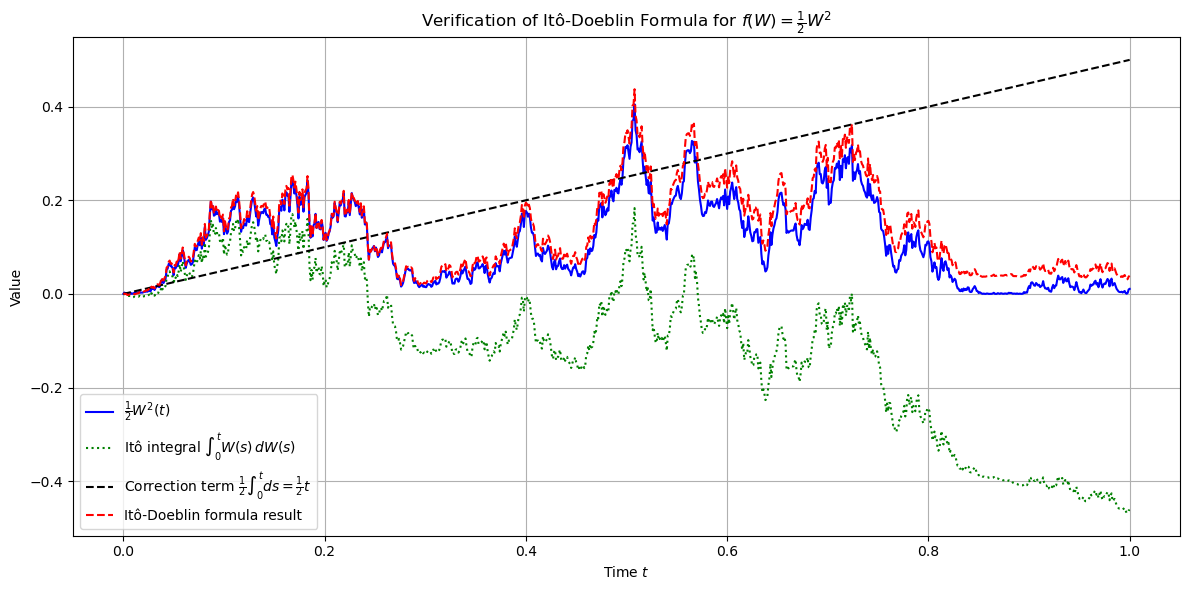

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 1.0          # Time horizon
N = 1000         # Number of time steps
dt = T / N       # Time step size
t = np.linspace(0, T, N+1)  # Time grid

# Generate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=N)
W = np.concatenate(([0], np.cumsum(dW)))

# Define f(W) = 1/2 * W^2, and its derivatives
f = 0.5 * W**2
f_prime = W         # f'(W) = W
f_double_prime = 1  # f''(W) = 1

# Compute Itô integral ∫₀ᵗ f'(W(s)) dW(s)
ito_integral = np.cumsum(f_prime[:-1] * dW)
ito_integral = np.concatenate(([0], ito_integral))

# Compute correction term: (1/2) ∫₀ᵗ f''(W(s)) ds = (1/2)t
correction = 0.5 * t

# Itô-Doeblin formula: f(W(t)) = ∫ f'(W) dW + 0.5 ∫ f''(W) dt
ito_doeblin = ito_integral + correction

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, f, label=r"$\frac{1}{2}W^2(t)$", color='blue')
plt.plot(t, ito_integral, label=r"Itô integral $\int_0^t W(s)\,dW(s)$", linestyle='dotted', color='green')
plt.plot(t, correction, label=r"Correction term $\frac{1}{2} \int_0^t ds = \frac{1}{2}t$", linestyle='--', color='black')
plt.plot(t, ito_doeblin, label="Itô-Doeblin formula result", linestyle='dashed', color='red')
plt.xlabel("Time $t$")
plt.ylabel("Value")
plt.title("Verification of Itô-Doeblin Formula for $f(W) = \\frac{1}{2}W^2$")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


The plot shows:

- Blue line: The function $f(W(t)) = \frac{1}{2} W^2(t)$.
- Green dotted line: The Itô integral $\int_0^t f'(W(s)) dW(s)$.
- Black dashed line: The correction term $\frac{1}{2} \int_0^t f''(W(s)) ds = \frac{1}{2}t$.
- Red dashed line: The full Itô-Doeblin result, combining the Itô integral and the correction term.

As you can see, the red curve (the Itô-Doeblin reconstruction) matches exactly the blue curve, illustrating how the additional correction term compensates for the non-zero quadratic variation of Brownian motion. ​

---

## Black-Scholes-Merton Equation

In this section, we derive the Black-Scholes-Merton partial differential equation, which is one of the central results in financial mathematics. It describes how the price of an option evolves when the underlying asset follows a geometric Brownian motion.

The key idea behind this derivation is based on the no-arbitrage principle and the concept of constructing a self-financing and risk-free portfolio. This is the continuous-time analogue of the replication argument used in the binomial model.

### Evolution of the portfolio value

Consider an investor who holds a self-financing portfolio with total value $X(t)$ at time $t$. The portfolio consists of:

A risky asset (a stock) with price $S(t)$, which follows a geometric Brownian motion.

A risk-free money market account earning a constant interest rate $r$.

The dynamics of the stock price $S(t)$ are given by:

$$
dS(t) = \alpha S(t)dt + \sigma S(t)dW(t)
$$

where:

- $\alpha$ is the expected rate of return of the stock.
- $\sigma$ is the volatility.
- $W(t)$ is a standard Brownian motion.

At time $t$, the investor holds $\Lambda(t)$ shares of the stock. The remaining amount, $X(t) - \Lambda(t) S(t)$, is invested in the risk-free account.

The dynamics of the portfolio value are:

$$
dX(t) = \Lambda(t)dS(t) + r(X(t) - \Lambda(t)S(t))dt
$$

Substitunting the dynamics of S(t) into X(t), we obtain:

$$
\begin{align}
dX(t) = \Lambda(t)(\alpha S(t)dt + \sigma S(t)dW(t)) + r(X(t) - \Lambda(t)S(t))dt\\
= rX(t)dt + (\alpha - r)\Lambda(t)S(t)dt + \Lambda(t)\sigma S(t)dW(t)
\end{align}
$$

Interpretation of the terms:

- $r X(t) , dt$: risk-free growth of the total portfolio.
- $\Lambda(t) (\alpha - r) S(t) , dt$: excess return from holding the risky asset.
- $\Lambda(t) \sigma S(t) , dW(t)$: random fluctuation due to stock price volatility.

### Discounted Portfolio and Stock Price

We now understand how to estimate how both the sotck price as well as the portfolio of a stock and a risk-free asset evolves. 

However, this equation includes the risk-free rate $r$.
In finance, we always discount the prices by $e^{-r t}$ to move into the risk-neutral world and remove the risk-free growth.

This now brings two additional quesitons:

- How does the discounted stock price evolve?
- How does the discounted portfolio value evolve?

To proceed with the hedging argument, we simplify the dynamics by working with discounted values:

- Discounted stock price: $e^{-r t} S(t)$
- Discounted portfolio value: $e^{-r t} X(t)$

This removes the deterministic growth at rate $r$ and allows us to isolate the risky part of the price process.

To compute this, we can now finally get back to the Ito-Doeblin formula. 

#### The need for the Ito Doeblin formula for discounted stock and portfolio evolution

In order to understand how the stock price evolves over time, we need to calculate $d(e^{-rt}S(t))$.

In ordinary calculus, when we compute the differential of a product like $e^{-r t} S(t)$, we would simply use the product rule:

$$
d(e^{-rt}S(t)) = \frac{d}{dt}e^{-rt}S(t)dt + e^{-rt}dS(t)
$$

However, this rule only works if $S(t)$ is differentiable.
In our case, $S(t)$ follows a stochastic differential equation:

$$
dS(t) = \alpha S(t)dt + \sigma S(t)dW(t)
$$

The process $W(t)$ is a Brownian motion and is nowhere differentiable.
This means that:

- $S(t)$ is not differentiable.
- Its path is rough and has non-zero quadratic variation.

Therefore, ordinary calculus breaks down.

The **product rule and chain rule from classical calculus** are **no longer valid** because they ignore the **impact of the randomness and roughness of $W(t)$**.

As we showed before, the Itô-Doeblin formula is a generalized chain rule specifically designed for functions of stochastic processes.

It modifies the usual chain rule by adding an additional correction term that accounts for the nonzero quadratic variation of Brownian motion.

We were able to show the result of the formula for both a variable which depends only on a stochastic process (one variable Itô-Doeblin):

$$
df(W(t)) = f'(W(t))dW(t) + \frac{1}{2}f''(W(t))dt
$$

and one which depends on both time and the stochastic process (two variable Itô-Doeblin):

$$
df(t, W(t)) = f_t(t, W(t))dt + f_x(t, W(t))dW(t) + \frac{1}{2}(t, W(t))d[W,W](t)
$$

#### Using the Ito Doeblin formula to obtain the discounted stock and portfolio evolutions

Now that we recapitulated the need for the Ito-Doeblin formula, we can apply it to both the discounted stock movements as well as the discounted portfolio movements.

##### Evolution of the stock price

For the dynamics of the stock price we get: 

$$
\begin{align}
d(e^{-rt}S(t)) = f_t(t, S(t))dt + f_{S(t)}(t, S(t))dS(t) + \frac{1}{2}f_{S(t)S(t)}(t, S(t))dS(t)dS(t)
\end{align}
$$

Here, we have three terms:

- $f_t(t, S(t)) = -re^{-rt}S(t)$
- $f_{S(t)}(t, S(t)) = e^{-rt}$
- $f_{S(t)S(t)}(t, S(t))dS(t) = 0$

Note that the third term is simply zero because $f(t, x)$ is affine (linear) in $x$. If it were nonlinear (e.g. $x^2$ etc), the term would not vanish as the quadratic variation matters. 

So, for the dynamics of the Stock, we obtain:

$$
\begin{align}
d(e^{-rt}S(t)) = f_t(t, S(t))dt + f_{S(t)}(t, S(t))dS(t) + \frac{1}{2}f_{S(t)S(t)}(t, S(t))dS(t)dS(t) \\
= -re^{-rt}S(t)d(t) + e^{-rt}dS(t) \\
= -re^{-rt}S(t)dt + e^{-rt}(\alpha S(t)dt + \sigma S(t)dW(t))\\
= (\alpha - r)e^{-rt}S(t)dt + \sigma e^{-rt}S(t)dW(t)
\end{align}
$$

##### Evolution of the portfolio value

For the dynamics of the portfolio value we get:

$$
\begin{align}
d(e^{-rt}X(t)) = f_t(t, X(t))dt + f_{X(t)}(t, X(t))dX(t) + \frac{1}{2}f_{X(t)X(t)}(t, X(t))dX(t)dX(t)
\end{align}
$$

Here, we have three terms:

- $f_t(t, X(t)) = -re^{-rt}X(t)$
- $f_{X(t)}(t, X(t)) = e^{-rt}$
- $f_{X(t)X(t)}(t, X(t))dX(t) = 0$

whereas the third term is again zero due to the affinity (linearity).

Substituting this into the preliminary equation, we obtain:

$$
\begin{align}
d(e^{-rt}X(t)) = f_t(t, X(t))dt + f_{X(t)}(t, X(t))dX(t) + \frac{1}{2}f_{X(t)X(t)}(t, X(t))dX(t)dX(t) \\
= -re^{-rt}X(t)dt + e^{-rt}(rX(t)dt + (\alpha - r)\Lambda(t)S(t)d(t) + \Lambda(t)\sigma S(t)dW(t))\\
= \Lambda(t)(\alpha - r)e^{-rt}S(t)d(t) + \Lambda(t)\sigma e^{-rt}S(t)dW(t)\\
= \Lambda(t)((\alpha - r)e^{-rt}S(t)d(t) + \sigma e^{-rt}S(t)dW(t))\\
= \Lambda(t)d(e^{-rt}S(t))
\end{align}
$$

This result is crucial!

- It tells us that the change in the discounted portfolio value is **exactly caused£** by the **change in the discounted stock** price.

This will allow us to build a risk-free hedged portfolio in the next step, which leads to the Black-Scholes-Merton PDE.

### Evolution of the Option Value

In the previous section, we derived that the change in the discounted portfolio value is entirely driven by the change in the discounted stock price.

This result is crucial because it shows that by **dynamically adjusting the number of shares $\Lambda(t)$**, an investor can **perfectly replicate the evolution of the portfolio value** using **only the underlying asset** and the **money market account**. This is the foundation of the no-arbitrage replication argument in the Black-Scholes-Merton framework.

To price an option, we now apply the same logic:

We consider the value of the option itself as part of such a replicating portfolio. To do this, we need to analyze how the option price evolves over time as a function of both time $t$ and the underlying stock price $S(t)$.

The next step is therefore to apply the Itô-Doeblin formula to the option price process $c(t, S(t))$. This will allow us to express the stochastic dynamics of the option value, which is essential to derive the Black-Scholes-Merton equation.

**The European Call option**

Consider a European call option that pays $(S(T) - K)^+$ at time $T$, where $K$ is the strike price.
The value of this call option at time $t$ depends on:

- Time to maturity ($T - t$)
- Current stock price $S(t)$
- The parameters $r$ (risk-free rate), $\sigma$ (volatility), and $K$ (strike price)

We denote the option price function by:

$$
c(t,x)
$$

which is the price of the option at time $t$ when the stock price is $x$.
Importantly:

- $c(t, x)$ is deterministic (it is a function).
- However, the actual option price process is random and given by:

$$
c(t, S(t))
$$

since $S(t)$ is a stochastic process.

Our goal is to derive a differential equation for the function $c(t, x)$, so that we can express the future option price in terms of the future stock price.

#### Using the Ito Doeblin formula to obtain the evolution of the option value

We apply the Itô-Doeblin formula to the stochastic process $c(t, S(t))$.
Since $S(t)$ follows:

$$
dS(t) = \alpha S(t)dt + \sigma S(t)dW(t)
$$

the Itô-Doeblin formula yields:

$$
dc(t, S(t)) = c_t(t, S(t))dt + f_{S(t)}(t, W(t))dS(t) + \frac{1}{2}f_{S(t), S(t)}(t, S(t))dS(t)dS(t)
$$

where:

- $dS(t)dS(t) = \sigma^2S^2(t)dt$

Given this, we obtain:

$$
\begin{align}
dc(t, S(t)) = c_t(t, S(t))dt + c_{S(t)}(t, W(t))(\alpha S(t)dt + \sigma S(t)dW(t)) + \frac{1}{2}c_{S(t), S(t)}(t, S(t))\sigma^2S^2(t)dt\\
= (c_t(t, S(t)) + \alpha S(t)c_{S(t)}(t, W(t)) + \frac{1}{2}\sigma^2S^2(t)c_{S(t), S(t)}(t, S(t)))dt + \sigma S(t)c_{S(t)}dW(t)
\end{align}
$$

#### Using the Ito Doeblin formula to obtain the evolution of the discounted option value

Given the result above, we can now calculate the discounted option price process:

$$
e^{-rt}c(t, S(t))
$$

where:

$$
f(t,c(t, S(t)) = e^{-rt}c(t, S(t))
$$

For the dynamics of the discounted option value we get:

$$
\begin{align}
d(e^{-rt}c(t, S(t))) = f_t(t, c(t, S(t))dt + f_{c(t, S(t))}(t, c(t, S(t))dc(t, S(t)) + \frac{1}{2}f_{c(t, S(t)c(t, S(t)}(t, c(t, S(t))dc(t, S(t))dc(t, S(t))
\end{align}
$$

Here, we have three terms:

- $f_t(t, c(t, S(t)) = -re^{-rt}c(t, S(t))$
- $f_{c(t, S(t)}(t, c(t, S(t)) = e^{-rt}$
- $f_{c(t, S(t)c(t, S(t)}(t, c(t, S(t))dc(t, S(t) = 0$

So, we obtain:

$$
\begin{align}
d(e^{-rt}c(t, S(t))) = -re^{-rt}c(t, S(t))dt + e^{-rt}dc(t, S(t))\\
= e^{-rt}(-rc(t, S(t)) + c_t(t, S(t)) + \alpha S(t)c_{S(t)}(t, W(t)) + \frac{1}{2}\sigma^2S^2(t)c_{S(t), S(t)}(t, S(t)))dt + e^{-rt}\sigma S(t)c_{S(t)}dW(t)
\end{align}
$$

This is the key formula that will allow us to derive the Black-Scholes-Merton partial differential equation (PDE).